# Лаб. №2: визуализация данных с использованием библиотек python. Matplotlib

Для анализа был выбран датасет "More Guns, Less Crime?", представляющий собой набор данных по 50 штатам США плюс округ Колумбия (в общей сложности 51 штат), с разбивкой по годам за 1977-1999 годы.


Описание датасета: https://vincentarelbundock.github.io/Rdatasets/doc/AER/Guns.html

# Описание данных

Данные являются многомерными, поскольку для каждого года фиксируется вектор наблюдений. Каждая запись характеризуется 13-ю признаками:

1) state - фактор, указывающий на штат;

2) year - год, к которому относятся данные;

3) violent - уровень насильственных преступлений (инциденты на 100 000 человек населения);

4) murder - уровень убийств (инцидент на 100 000);

5) robbery - частота ограблений (инцидент на 100 000);

6) prisoners - количество заключенных в предыдущем году (осужденные на 100 000 жителей; значение за предыдущий год);

7) afam - процент афроамериканцев от населения штата в возрасте от 10 до 64 лет;

8) caucasus - процент населения штата, являющегося европеоидом, в возрасте от 10 до 64 лет;

9) male - процентная доля мужского населения штата в возрасте от 10 до 29 лет;

10) population - население штата, в миллионах человек;

11) income - реальный личный доход на душу населения в штате (доллары США);

12) density - численность населения на квадратную милю площади суши, деленная на 1000;

13) law - фактор. Действует ли в этом году в штате закон о ношении оружия*?

*Закон о ношении оружия - это закон, который требует, чтобы правительства выдавали разрешения на скрытое ношение оружия любому заявителю, который соответствует необходимым критериям. Вторая поправка к Конституции Соединенных Штатов защищает право хранить и носить оружие, также известна как закон о ношении оружия.

In [ ]:
# импорт библиотек

import pandas as pd

In [ ]:
# чтение файла с диска и загрузка в датафрейм

path = "/content/drive/MyDrive/STUDY/Представление знаний и визуализация данных/Lab_1/Guns.csv"
df = pd.read_csv(path, index_col=0) #index_col=0 - убираем нумерацию строк
df.shape #размерность данных

(1173, 13)

# Типы признаков

In [ ]:
# вывод информации о признаках

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 1 to 1173
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1173 non-null   int64  
 1   violent     1173 non-null   float64
 2   murder      1173 non-null   float64
 3   robbery     1173 non-null   float64
 4   prisoners   1173 non-null   int64  
 5   afam        1173 non-null   float64
 6   cauc        1173 non-null   float64
 7   male        1173 non-null   float64
 8   population  1173 non-null   float64
 9   income      1173 non-null   float64
 10  density     1173 non-null   float64
 11  state       1173 non-null   object 
 12  law         1173 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 128.3+ KB


Типы признаков:

1) state - номинальные категоризованные, неметрическая номинативная шкала;

2) year - номинальные категоризованные, неметрическая номинативная шкала;

3) violent - количественные, метрическая шкала отношений;

4) murder -  количественные, метрическая шкала отношений;

5) robbery -  количественные, метрическая шкала отношений;

6) prisoners -  количественные, метрическая шкала отношений;

7) afam - количественные, метрическая шкала отношений;

8) caucasus - количественные, метрическая шкала отношений;

9) male - количественные, метрическая шкала отношений;

10) population - количественные, абсолютная метрическая шкала;

11) income - количественные, метрическая шкала отношений;

12) density - количественные, метрическая шкала отношений;

13) law - номинальные категоризованные, неметрическая номинативная шкала;

# Визуализация данных с помощью Matplotlib

In [ ]:
# импорт библиотек
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Кодирование категориальных переменных

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['code_law'] = df['law']
df.code_law = le.fit_transform(df.code_law)

df.head()

,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law,code_law
1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no,0
2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no,0
3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no,0
4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no,0
5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no,0


## Типы визуализации в зависимости от типа признака

Наиболее подходящими и простыми средствами визуализации качественных данных являются столбчатая и круговая диаграммы, в то время как для количественных распространены гистограмма и боксплоты.

<BarContainer object of 2 artists>

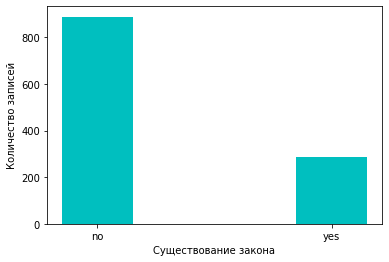

In [ ]:
# соотношение количества записей
# для разных значений признака 'law'

laws = df['law'].value_counts()
plt.xlabel('Существование закона')
plt.ylabel('Количество записей')
plt.bar(x=laws.index, height=laws.values, width = 0.3, color='c')

Как видно из диаграммы, количество записей для признака law='no'(закон не принят) превосходит количество для law='yes' (закон принят). Но диаграмма не содержит информации, отражающей тенденцию закона по годам.

In [ ]:
# собираем данные для каждого года отдельно,
# чтобы посмотреть динамику принятия закона по годам

cat_par = df['year'].unique()

g1 = []
g2 = []

for y in cat_par:
  g1.append(len(df[(df['year']==y) &(df['law']=='no')]))
  g2.append(len(df[(df['year']==y) &(df['law']=='yes')]))


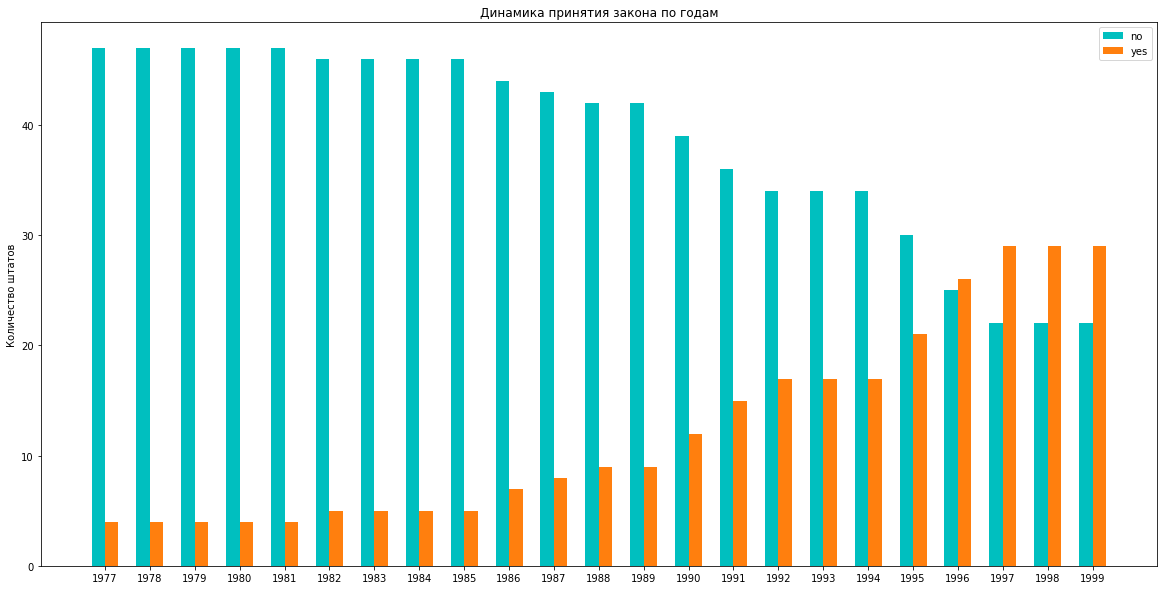

In [ ]:
# построение диаграммы динамики принятия закона

width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, g1, width, label='no', color = 'c')
rects2 = ax.bar(x + width/2, g2, width, label='yes', color = 'tab:orange')
ax.set_title('Динамика принятия закона по годам')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
plt.ylabel('Количество штатов')
ax.legend()

Диаграмма показывает, что количество штатов, в которых принят закон о ношении оружия увеличивалось с 1977 по 1999 год.

(-1.100000002625566,
 1.1000000049086551,
 -1.1001739046011954,
 1.1001739034593832)

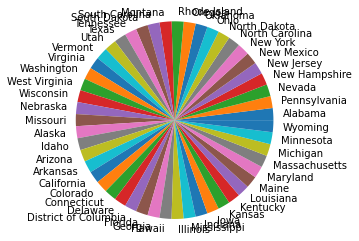

In [ ]:
# визуализация признака 'state' (штат)

# считаем количество записей для каждого штата
states = df['state'].value_counts()

fig, ax = plt.subplots()
ax.pie(states.values, labels=states.index)
ax.axis('equal')

Продемонстрировали, что у нас одинаковое количество данных по каждому штату, следовательно, имеется статистика по каждому штату за все года.

(-1.1000000030651167,
 1.1000000057304324,
 -1.1008547856333128,
 1.100854784299101)

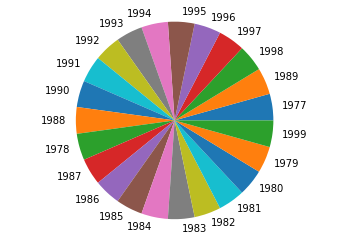

In [ ]:
# аналогичная визуализация признака 'year'

years = df['year'].value_counts()

fig, ax = plt.subplots()
ax.pie(years.values, labels=years.index)
ax.axis('equal')

Аналогичный результат (но более наглядный) для диаграммы по годам. Все года содержат одинаковое количество записей. Это ещё не спасает нас от дубликатов/ошибочных данных (когда, например, для одного и того же штата одновременно может быть указано low='no' и low='yes'), но уже дает некоторое представление о распределении признака.

array([[<AxesSubplot:title={'center':'violent'}>,
        <AxesSubplot:title={'center':'murder'}>,
        <AxesSubplot:title={'center':'robbery'}>],
       [<AxesSubplot:title={'center':'prisoners'}>,
        <AxesSubplot:title={'center':'afam'}>,
        <AxesSubplot:title={'center':'cauc'}>],
       [<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'density'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

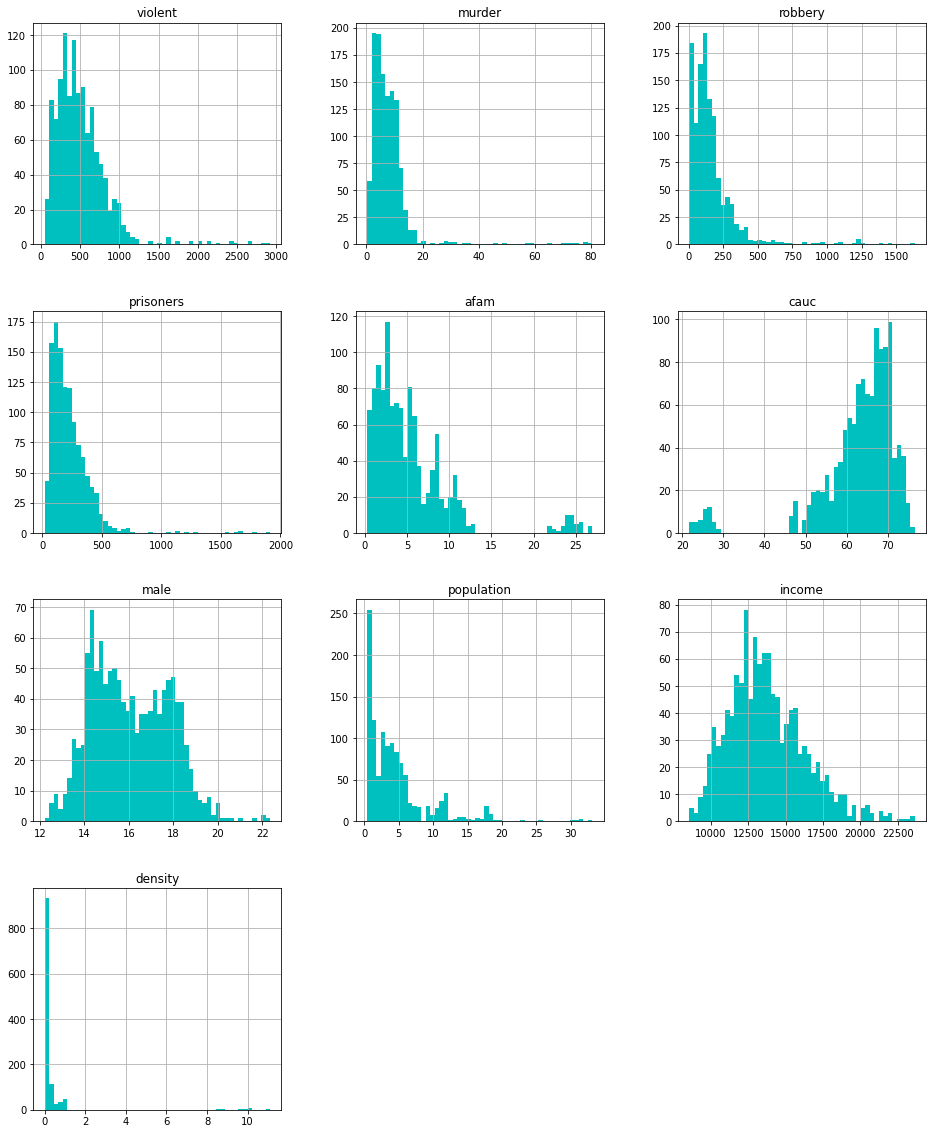

In [ ]:
# построение гистограмм для количественных признаков

quantitative_df = df.drop(['law', 'year', 'state','code_law'], axis='columns')
quantitative_df.hist(figsize=(16, 20), bins=50, color='c')

## Характер распределений признаков

По гистограммам можно предположить, что признаки распределены асимметрично:

- левостороннее распределение (violent, murder, robbery, prisoners, afam, population, density, income - асимметрия выражена в меньшей степени)
- правостороннее распределение (cauc)
- бимодальное (male)


При этом гистограммы признаков murder, robbery, prisoners и population напоминают вид графика плотности экспоненциального распределения.

## Поиск закономерностей между признаками

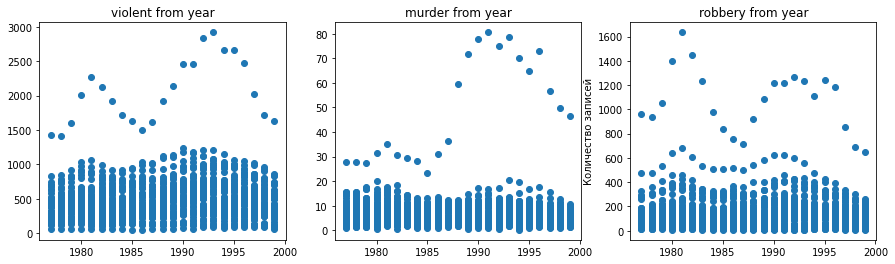

In [ ]:
figure, axis = plt.subplots(1, 3, figsize=(15, 4))
  
axis[0].scatter(df['year'], df['violent'])
axis[0].set_title("violent from year")
  
axis[1].scatter(df['year'], df['murder'])
axis[1].set_title("murder from year")
  
axis[2].scatter(df['year'], df['robbery'])
axis[2].set_title("robbery from year")
  
plt.show()

Рассмотрим зависимости violent, murder и robbery от года на диаграмме рассеяния.
По диаграмме можно заметить, что определенные точки находятся на большом расстоянии от основного скопления точек, из чего можно предположить, что в некотором штате очень высокая преступность.

Посмотрим зависимость violent от state.

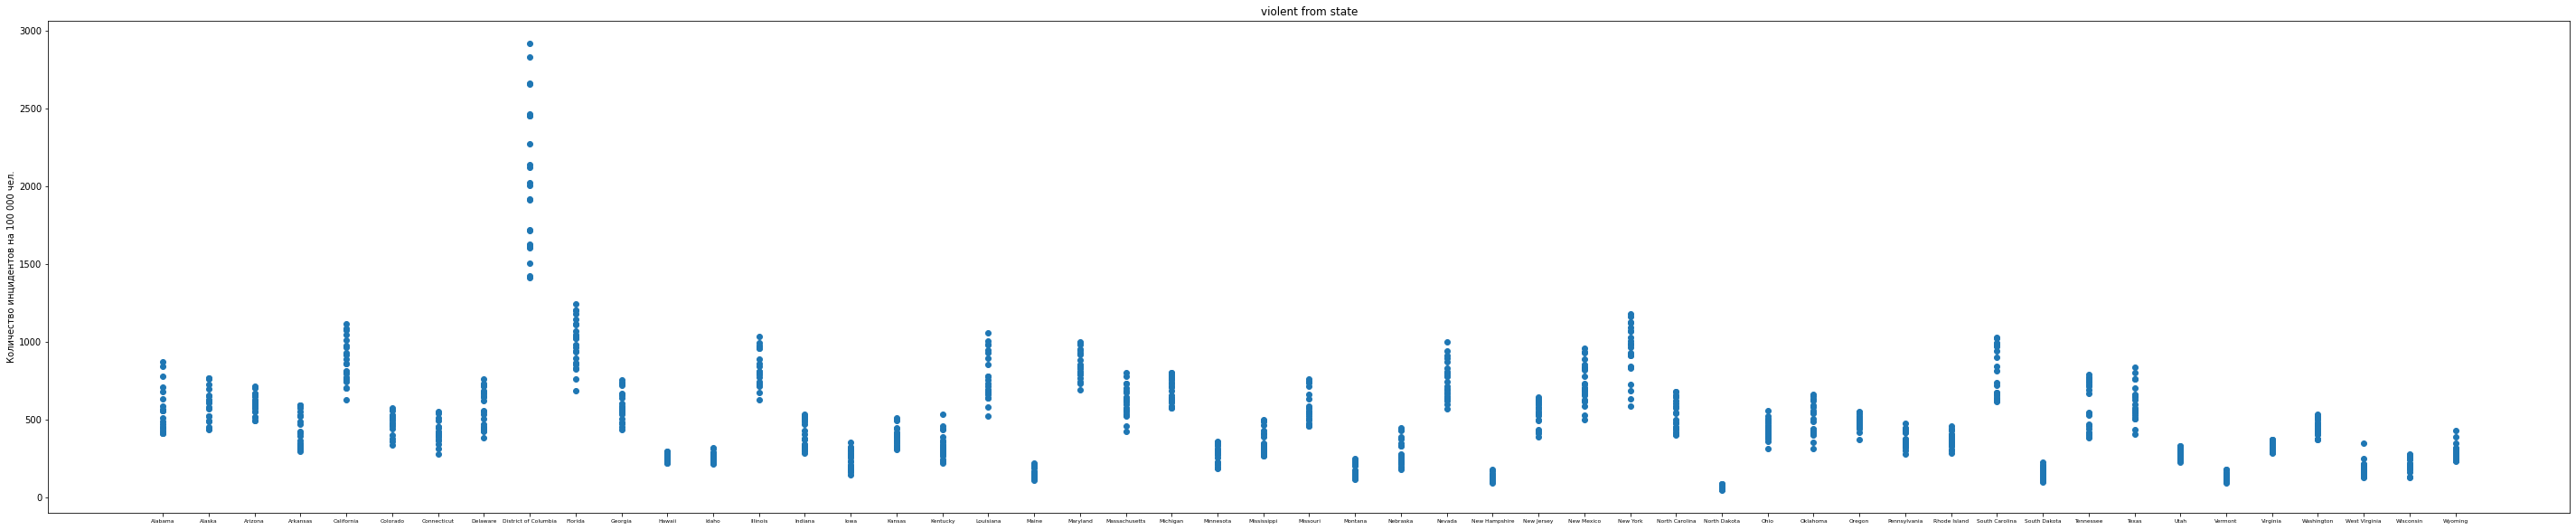

In [ ]:
figure, axis = plt.subplots(figsize=(50, 10))
  
axis.scatter(df['state'], df['violent'])
axis.set_title("violent from state")
plt.ylabel('Количество инцидентов на 100 000 чел.')
plt.tick_params(axis='x', which='major', labelsize=6)

Из графика видно, что наибольшее число преступлений совершалось в округе Колумбия. Если проверить максимальные значения для violent, murder и robbery, то они также соответствуют этому округу.

In [ ]:
# найдем строки с максимальным значением
str1 = df[df['violent']==df['violent'].max()]
str2 = df[df['murder']==df['murder'].max()]
str3 = df[df['robbery']==df['robbery'].max()]

# выведем строки на экран
print(str1['state'])
print(str2['state'])
print(str3['state'])

201    District of Columbia
Name: state, dtype: object
199    District of Columbia
Name: state, dtype: object
189    District of Columbia
Name: state, dtype: object


Рассмотрим связь количества ограблений с процентами афроамериканцев и европеоидов от населения штата.

Text(0.5, 1.0, 'robbery from cauc')

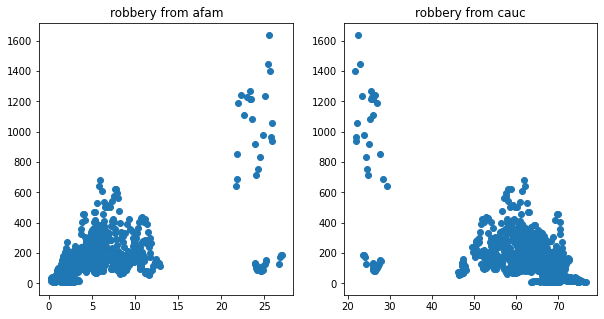

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
  
axis[0].scatter(df['afam'], df['robbery'])
axis[0].set_title("robbery from afam")
  
axis[1].scatter(df['cauc'], df['robbery'])
axis[1].set_title("robbery from cauc")

Графики являются симетричными, потому что чем больше афроамериканского населения, тем меньше европеоидов, и наоборот. 

По графику можно сделать вывод, что количество ограблений может зависеть от количества европеоидного населения в штате.

Text(0.5, 1.0, 'prisoners from cauc')

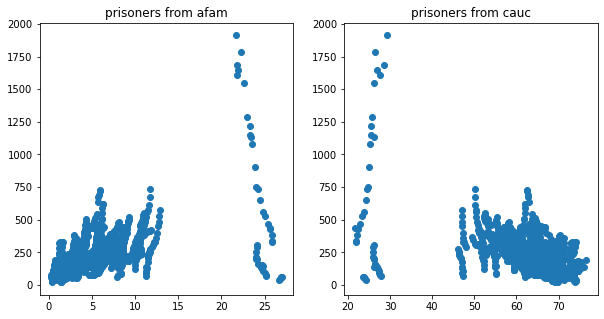

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
  
axis[0].scatter(df['afam'], df['prisoners'])
axis[0].set_title("prisoners from afam")
  
axis[1].scatter(df['cauc'], df['prisoners'])
axis[1].set_title("prisoners from cauc")

Зависимость количества заключенных от процентного содержания представителей расы среди населения штата. На основании графиков можно также предположить существование некоторой зависимости между количеством заключенных и расой.

Text(0.5, 1.0, 'violent from income')

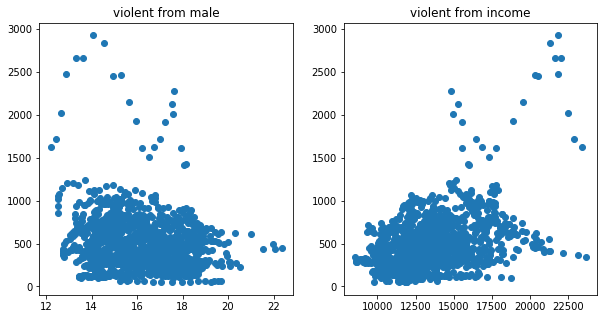

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
  
axis[0].scatter(df['male'], df['violent'])
axis[0].set_title("violent from male")
  
axis[1].scatter(df['income'], df['violent'])
axis[1].set_title("violent from income")

На графиках выше преставлена зависимость количества насильственных преступлений в зависимости от доли мужского населения (в возрасте от 10 до 29 лет) в штате и дохода на душу населения. Зависимость выражена не так заметно, как на предыдущих диаграммах.

## Выбросы

На диаграммах рассеяния заметны выбросы. Наибольшее количество преступлений происходит в округе Колумбия. Попробуем удалить данные о нём и посмотреть на диаграммы ещё раз. 

In [ ]:
new_df = df[df.state != 'District of Columbia']

Text(0.5, 1.0, 'robbery from cauc')

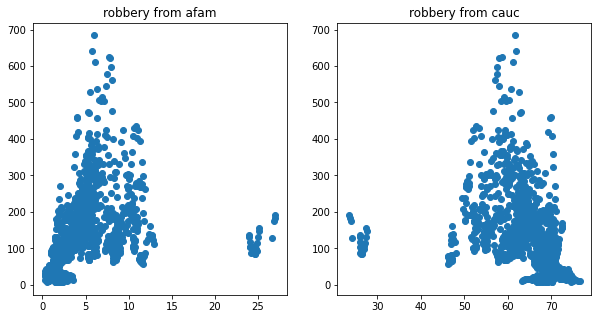

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

axis[0].scatter(new_df['afam'], new_df['robbery'])
axis[0].set_title("robbery from afam")
  
axis[1].scatter(new_df['cauc'], new_df['robbery'])
axis[1].set_title("robbery from cauc")

Text(0.5, 1.0, 'prisoners from cauc')

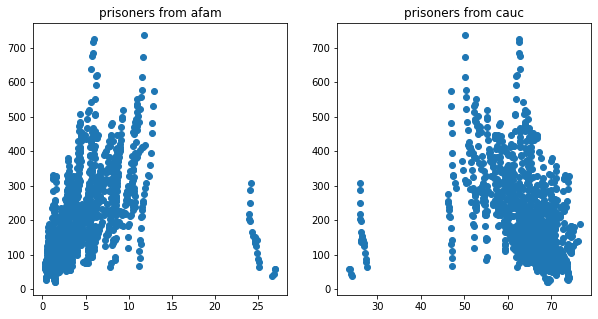

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

axis[0].scatter(new_df['afam'], new_df['prisoners'])
axis[0].set_title("prisoners from afam")
  
axis[1].scatter(new_df['cauc'], new_df['prisoners'])
axis[1].set_title("prisoners from cauc")

Text(0.5, 1.0, 'violent from income')

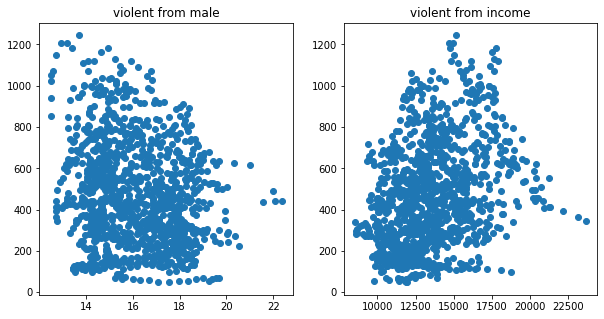

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
  
axis[0].scatter(new_df['male'], new_df['violent'])
axis[0].set_title("violent from male")
  
axis[1].scatter(new_df['income'], new_df['violent'])
axis[1].set_title("violent from income")

Выбросов стало меньше, но не все они оказались обусловленными показателями преступности в округе Колумбия.

# Выводы

В рамках лабораторной работы №2 был изучен инструментарий библиотеки Matplotlib, позволяющей строить двумерные и трехмерные графики, и с его помощью произведена визуализация признаков датасета "More Guns, Less Crime?" с целью представить характер их распределений и рассмотреть возможные зависимости. Качественная визуализация помогает экономить умственные усилия, что упрощает понимание взаимосвязей между данными.